In [ ]:
import sys
sys.path.append("../")
import Data as dt
import Labelling as lb

In [3]:
data  = dt.load_data(ticker="A")
data = data.loc['2012-01-01':'2017-01-01']

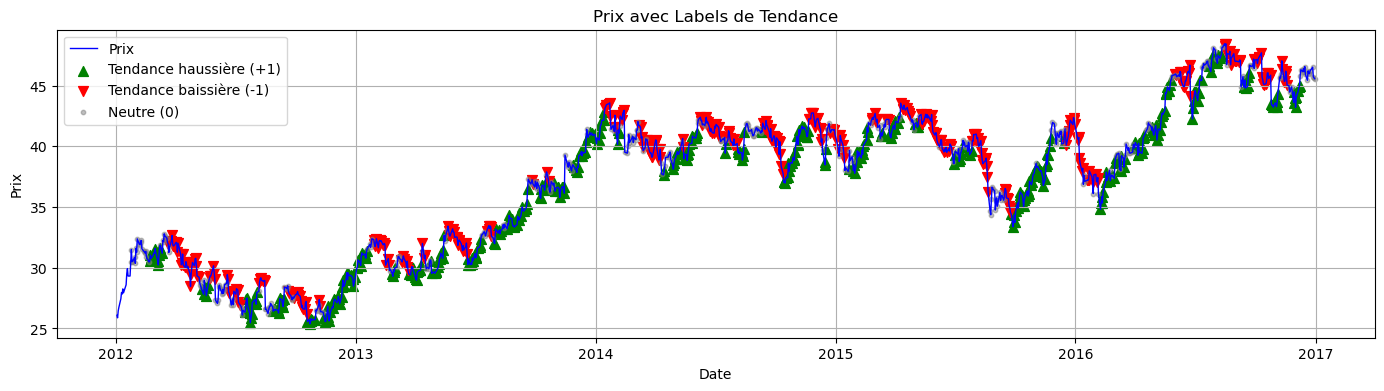

In [4]:
params_tb = {
    "upper_barrier": [1],
    "lower_barrier": [1],
    "vertical_barrier": [15],
    "window": [15],
    "smoothing_method": ["ewma"],
    "lambda_smooth": [0.5],
    "window_smooth": [15],
}
tripleBarrier = lb.tripleBarrier_labeller(data=data['close'], params=params_tb, n_jobs=1)
labels = tripleBarrier.extract()
tripleBarrier.plot_labels(labels_series=labels['set_0'])

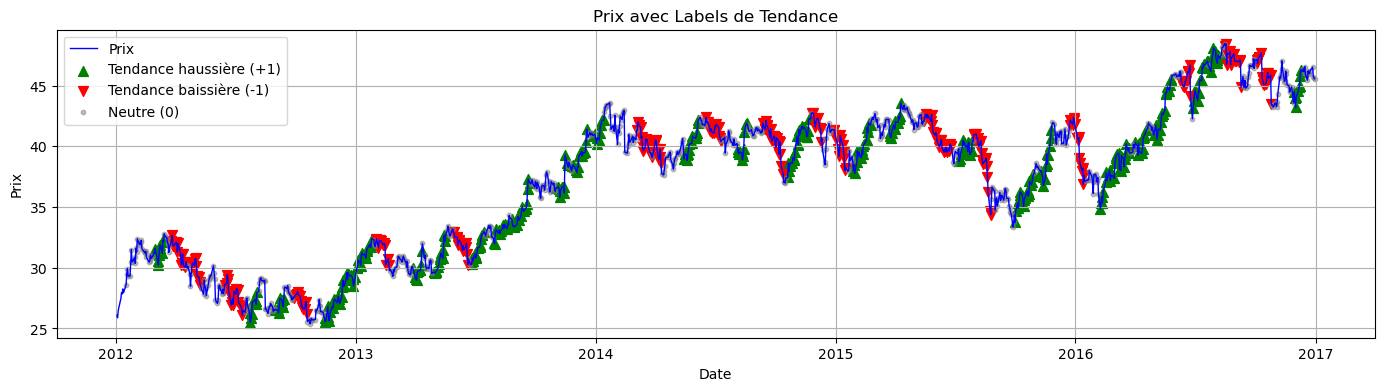

In [5]:
params_lf = {
    "window_lookForward": [10, 11],
    "min_trend_size": [10],
    "volatility_threshold": [1],
    "smoothing_method": ["ewma"],
    "window_smooth": [10],
    "lambda_smooth": [0.2],
}
lookForward = lb.lookForward_labeller(data=data['close'], params=params_lf, n_jobs=1)
labels = lookForward.extract()
lookForward.plot_labels(labels_series=labels['set_0'])

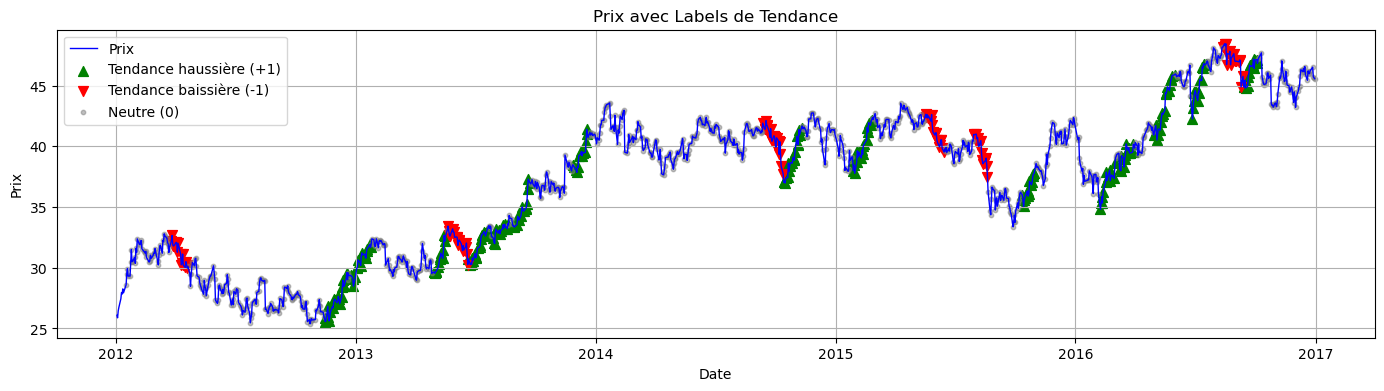

In [6]:
params_r2 = {
    "horizon": [5],
    "horizon_extension": [1.5],
    "r2_threshold": [0.5],
    "trend_size": [15],
    "smoothing_method": ["ewma"],
    "window_smooth": [10],
    "lambda_smooth": [0.5],
}
regR2rank = lb.regR2rank_labeller(data=data['close'], params=params_r2, n_jobs=1)
labels = regR2rank.extract()
regR2rank.plot_labels(labels_series=labels['set_0'])

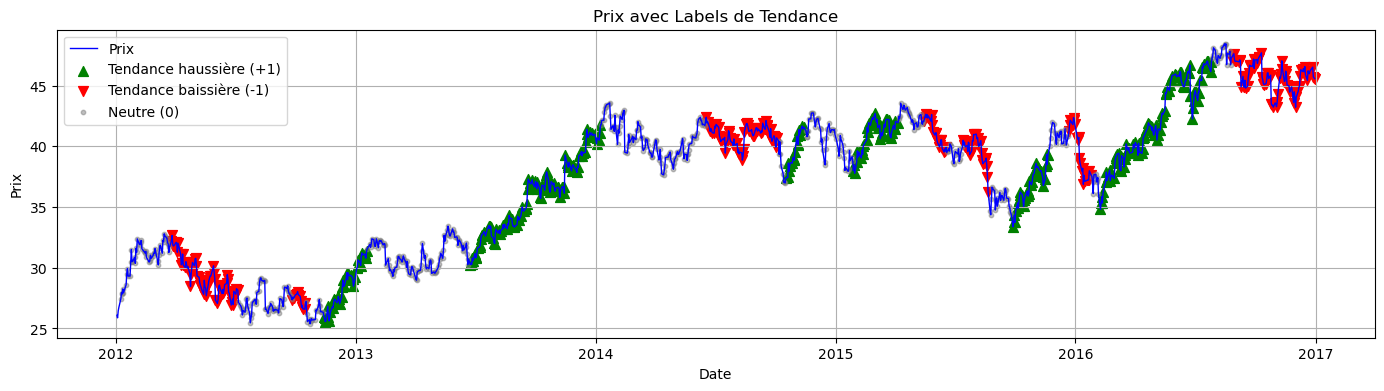

In [7]:
params_blf = {
    # ------- LookForward -------
    "window_lookForward": [10],
    "min_trend_size": [10],
    "volatility_threshold": [1],
    # ------- regR2rank -------
    "horizon": [15],
    "horizon_extension": [1.5],
    "r2_threshold": [0.5],
    "trend_size": [15],
    "smoothing_method": ["ewma"],
    "window_smooth": [5],
    "lambda_smooth": [0.3],
}
blf = lb.boostedlF_labeller(data=data['close'], params=params_blf, n_jobs=1)
labels = blf.extract()
blf.plot_labels(labels_series=labels['set_0'])

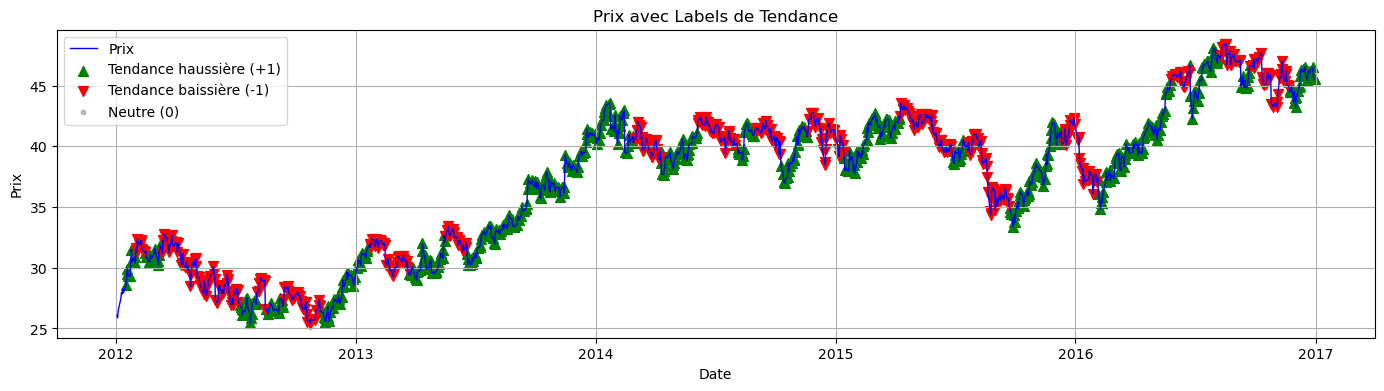

In [8]:
params_slope = {
    "horizon": [10],
    "horizon_extension": [1.5],
    "trend_size": [10],
    "smoothing_method": ["ewma"],
    "window_smooth": [10],
    "lambda_smooth": [0.5],
}
slope = lb.slope_labeller(data=data['close'], params=params_slope, n_jobs=1)
labels = slope.extract()
slope.plot_labels(labels_series=labels['set_0'])